In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/LR/CET_dataset.xlsx')

In [ ]:
# Adjusting the column name due to extra space in the original name
data.rename(columns={'Admitted ': 'Admitted'}, inplace=True)

# Display the first few rows of the dataset
print("Data head:\n", data.head())


Data head:
    CET_score  Admitted
0        480         1
1        450         1
2        390         1
3        410         1
4        380         1


In [ ]:
# Splitting the data into features and target variable
X = data[['CET_score']]
y = data['Admitted']

# Ensure that the feature names are retained when converting to NumPy for fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initializing and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report into a DataFrame
report_df = pd.DataFrame(class_report).transpose()
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[22  1]
 [ 0  9]]
Classification Report:
 {'0': {'precision': 1.0, 'recall': 0.9565217391304348, 'f1-score': 0.9777777777777777, 'support': 23}, '1': {'precision': 0.9, 'recall': 1.0, 'f1-score': 0.9473684210526316, 'support': 9}, 'accuracy': 0.96875, 'macro avg': {'precision': 0.95, 'recall': 0.9782608695652174, 'f1-score': 0.9625730994152046, 'support': 32}, 'weighted avg': {'precision': 0.971875, 'recall': 0.96875, 'f1-score': 0.9692251461988304, 'support': 32}}


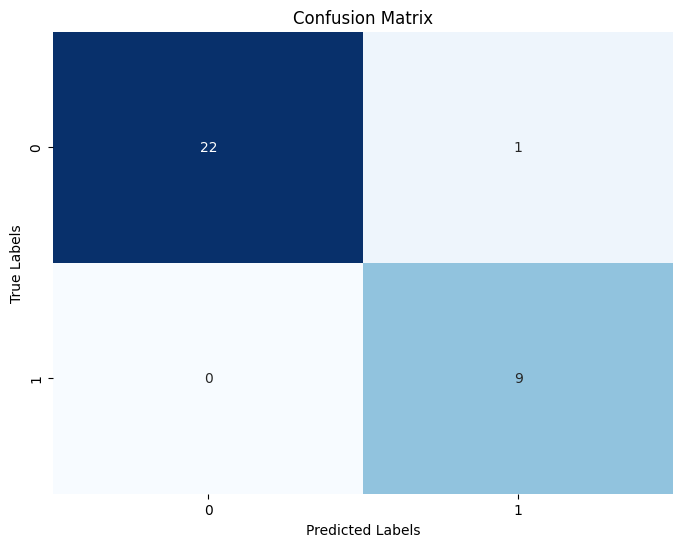

In [ ]:

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


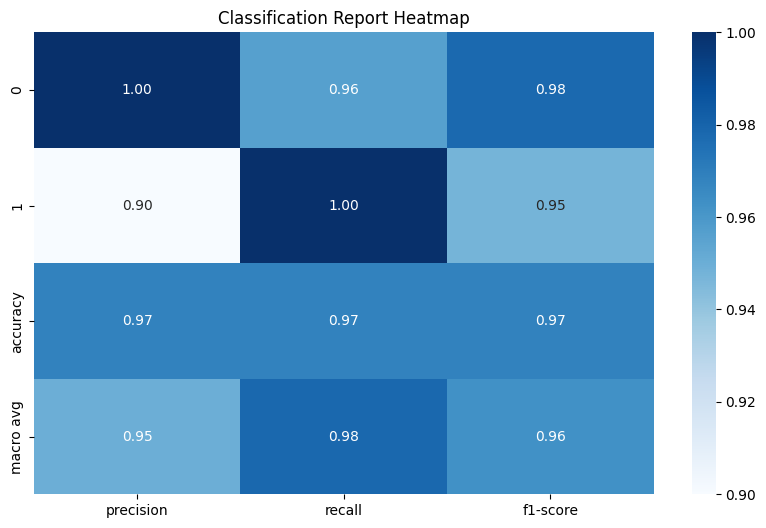

In [ ]:

# Visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(data=report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()


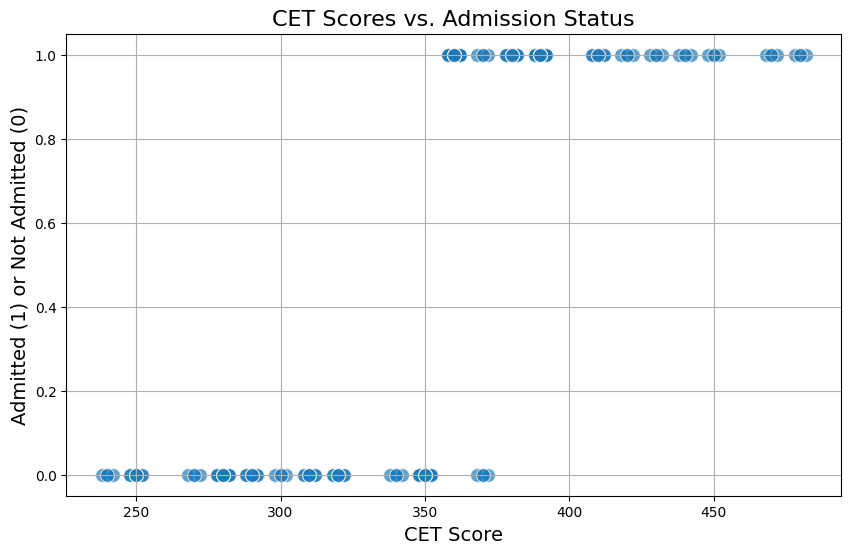

In [ ]:

# Visualize the data distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CET_score', y='Admitted', data=data, s=100, alpha=0.7, marker='o')
plt.title('CET Scores vs. Admission Status', fontsize=16)
plt.xlabel('CET Score', fontsize=14)
plt.ylabel('Admitted (1) or Not Admitted (0)', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:

# Generate scores for visualization of the decision boundary
x_values = np.linspace(data['CET_score'].min(), data['CET_score'].max(), 300)
x_values_reshape = x_values.reshape(-1, 1)

# Predict probabilities
y_probabilities = model.predict_proba(pd.DataFrame(x_values_reshape, columns=['CET_score']))[:, 1]


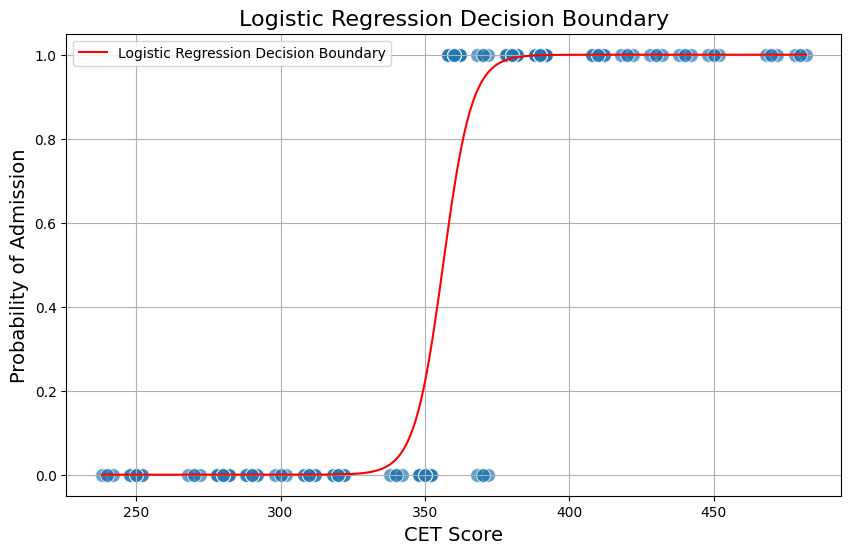

In [ ]:
# Plot decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CET_score', y='Admitted', data=data, s=100, alpha=0.7, marker='o')
plt.plot(x_values, y_probabilities, color='red', label='Logistic Regression Decision Boundary')
plt.title('Logistic Regression Decision Boundary', fontsize=16)
plt.xlabel('CET Score', fontsize=14)
plt.ylabel('Probability of Admission', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Odds ratio calculation
odds_ratio = np.exp(model.coef_[0])
print("Odds Ratio: ", odds_ratio)

Odds Ratio:  1.0065792476062316
